## Step 1: Collect Original Model
In our demo, we collect the original model by training YOLOv3 model on the Company's hand dataset

In [1]:
# path of original model: /ssddata1/users/dlproj/MetaHand/data_company/working_dir/origin_model/backup/cross-hands_best.weights
# from demo import DEMO
# demo_tool = DEMO()
# demo_tool.test_model("./data_company/working_dir/origin_model")
!podman exec -it suspicious_davinci /bin/bash -c 'cd /root/;./demo/evaluate_origin.sh'

INFO:root:Evaluating weights: ./data_company/working_dir/origin_model/backup/cross-hands_best.weights
 CUDA-version: 11030 (11030), cuDNN: 8.2.0, CUDNN_HALF=1, GPU count: 3  
 CUDNN_HALF=1 
 OpenCV isn't used - data augmentation will be slow 
0,1,2
 0 : compute_capability = 750, cudnn_half = 1, GPU: NVIDIA TITAN RTX 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv

Done! Loaded 107 layers from weights-file 

 calculation mAP (mean average precision)...
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
2000
 detections_count = 31319, unique_truth_count = 3384  
class_id = 0, name = hands, ap = 38.95%   	 (TP = 948, FP = 381) 

 for conf_thresh = 0.25, precision = 0.71, recall = 0.28, F1-score = 0.40 
 for conf_thresh = 0.25, TP = 948, FP = 381, FN = 2436, average IoU = 48.44 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.389505, or 38.95 % 
Total Detection Time: 13 Seconds

Set -points flag:
 `-points 101` for MS COCO 
 `-points 11` for PascalVOC 2007 (uncomment `difficult` in voc.data) 
 `-points 0` (AUC) for ImageNet, PascalVOC 2010-2012, your custom dataset


## Step 2: Test Construction
We apply gaussian noise on the hand object to corrupt hand-irrelevant features

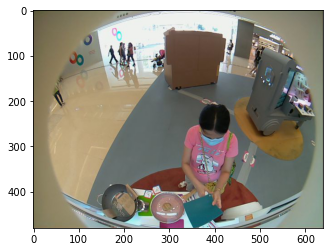

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Read Images
img = mpimg.imread('/ssddata1/users/dlproj/MetaHand/data_company/ImageSet/10108152.jpg')
 
# Output Images
plt.imshow(img)

In [3]:
!podman exec -it suspicious_davinci /bin/bash -c 'cd /root/;./demo/mutation_operation_demo.sh'

running guassian noise 0.3 and randon erase 0.0, mutation target is object
Initiating multi-processes
label_list: 10000
INFO: processing id /root/data_company/Labels/10108152.txt
processing label id /root/data_company/Labels/10108152.txt
INFO: processing id: /root/data_company/Labels/10108152.txt

INFO: mutation operlsator: random erase object
the random erase shrinks by 100.0
the random erase shrinks by 100.0
10108152.txt -- done 2 labels
running guassian noise 0.3 and randon erase 1.0, mutation target is object
Initiating multi-processes
label_list: 10000
INFO: processing id /root/data_company/Labels/10108152.txt
processing label id /root/data_company/Labels/10108152.txt
INFO: processing id: /root/data_company/Labels/10108152.txt

INFO: mutation operlsator: random erase object
the random erase shrinks by 100.0
the random erase shrinks by 100.0
10108152.txt -- done 2 labels


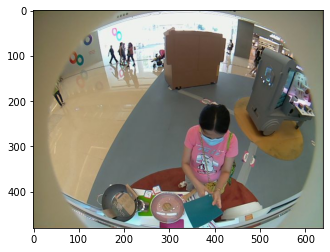

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread("/ssddata1/users/dlproj/MetaHand/data_company/demo/ObjactGaussianMutation/B_guassian_03_fixMutRatio_centerXY_10/10108152-B_guassian_03_fixMutRatio_centerXY_10.jpg")
plt.imshow(img)

## Step 3: MR Validation
We check whether the mutated images will expose the unreliable inference of the YOLOv3 model

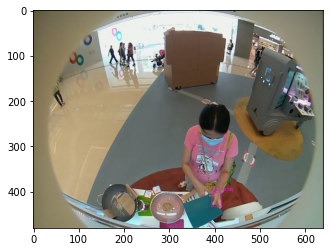

In [5]:
weights_path = "./data_company/working_dir/origin_model/backup/cross-hands_best.weights"
img_path = "./data_company/ImageSet/10108152.jpg"
from demo import DEMO
tool = DEMO()
tool.detect_image(weights_path, img_path)
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread("./images/10108152_label.jpg")
plt.imshow(img)

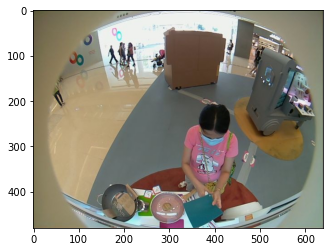

In [6]:
weights_path = "./data_company/working_dir/origin_model/backup/cross-hands_best.weights"
img_path = "./data_company/demo/ObjactGaussianMutation/B_guassian_03_fixMutRatio_centerXY_10/10108152-B_guassian_03_fixMutRatio_centerXY_10.jpg"
from demo import DEMO
tool = DEMO()
tool.detect_image(weights_path, img_path)
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread("./images/10108152-B_guassian_03_fixMutRatio_centerXY_10_label.jpg")
plt.imshow(img)

## Step 4: Model Repair
We repair the YOLOv3 model by retraining it on the error-prone mutated images.

## Step 5: The Performance Of Repaired Model

In [7]:
!podman exec -it suspicious_davinci /bin/bash -c 'cd /root/;./demo/evaluate_repair.sh'
# demo_tool.test_model("./data_company/working_dir/ObjectGaussianMutation/B_guassian_160_fixMutRatio_centerXY_03_th03/data")

INFO:root:Evaluating weights: ./data_company/working_dir/ObjectGaussianMutation/B_guassian_160_fixMutRatio_centerXY_03_th03/data/backup/cross-hands_best.weights
 CUDA-version: 11030 (11030), cuDNN: 8.2.0, CUDNN_HALF=1, GPU count: 3  
 CUDNN_HALF=1 
 OpenCV isn't used - data augmentation will be slow 
0,1,2
 0 : compute_capability = 750, cudnn_half = 1, GPU: NVIDIA TITAN RTX 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 

Done! Loaded 107 layers from weights-file 

 calculation mAP (mean average precision)...
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
2000
 detections_count = 30664, unique_truth_count = 3384  
class_id = 0, name = hands, ap = 45.39%   	 (TP = 1093, FP = 323) 

 for conf_thresh = 0.25, precision = 0.77, recall = 0.32, F1-score = 0.46 
 for conf_thresh = 0.25, TP = 1093, FP = 323, FN = 2291, average IoU = 52.75 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.453894, or 45.39 % 
Total Detection Time: 13 Seconds

Set -points flag:
 `-points 101` for MS COCO 
 `-points 11` for PascalVOC 2007 (uncomment `difficult` in voc.data) 
 `-points 0` (AUC) for ImageNet, PascalVOC 2010-2012, your custom dataset


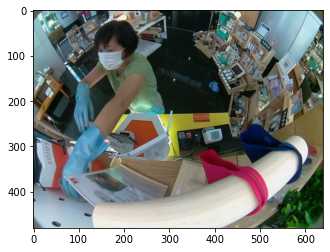

In [8]:
weights_path = "./data_company/working_dir/origin_model/backup/cross-hands_best.weights"
img_path = "./data_company/ImageSet/10113603.jpg"
from demo import DEMO
tool = DEMO()
tool.detect_image(weights_path, img_path)
import shutil
shutil.copy("./images/10113603_label.jpg", "./images/10113603_label_origin.jpg")
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread("./images/10113603_label_origin.jpg")
plt.imshow(img)

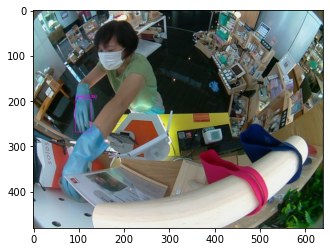

In [9]:
weights_path = "./data_company/working_dir/ObjectGaussianMutation/B_guassian_160_fixMutRatio_centerXY_03_th03/data/backup/cross-hands_best.weights"
img_path = "./data_company/ImageSet/10113603.jpg"
from demo import DEMO
tool = DEMO()
tool.detect_image(weights_path, img_path)
import shutil
shutil.copy("./images/10113603_label.jpg", "./images/10113603_label_repair.jpg")
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread("./images/10113603_label_repair.jpg")
plt.imshow(img)